In [2]:
%run SAT_help_functions.ipynb

In [3]:
df = pd.read_csv('OUMresult_Rafiei2021_old.csv')
df

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Contrast,SAT,participant,Drift Rate,Boundary Separation,Non-decision Time,Self-excitation
0,0,0,2,1,1,1,0.000000,1.568888,0.100309,17.044047
1,1,1,3,1,2,1,0.579896,0.954466,0.185385,8.473042
2,2,2,4,1,3,1,0.288890,3.318995,0.139665,11.154863
3,3,3,5,1,4,1,0.071698,4.568654,0.103355,10.613806
4,4,4,6,1,5,1,0.510670,0.944485,0.225989,3.787335
...,...,...,...,...,...,...,...,...,...,...
745,745,245,247,5,1,30,0.000000,1.270804,0.100128,14.764992
746,746,246,248,5,2,30,2.168604,4.345238,0.176434,13.616276
747,747,247,249,5,3,30,3.925519,0.833694,0.303050,6.235077
748,748,248,250,5,4,30,3.494954,0.748982,0.306886,6.802331


In [4]:
df = df.rename({'Stimulus Contrast': 'Contrast',
                "Effective Inhibition": 'Self-excitation'
               }, axis=1)
df.to_csv('OUMresult_Rafiei2021_old.csv')


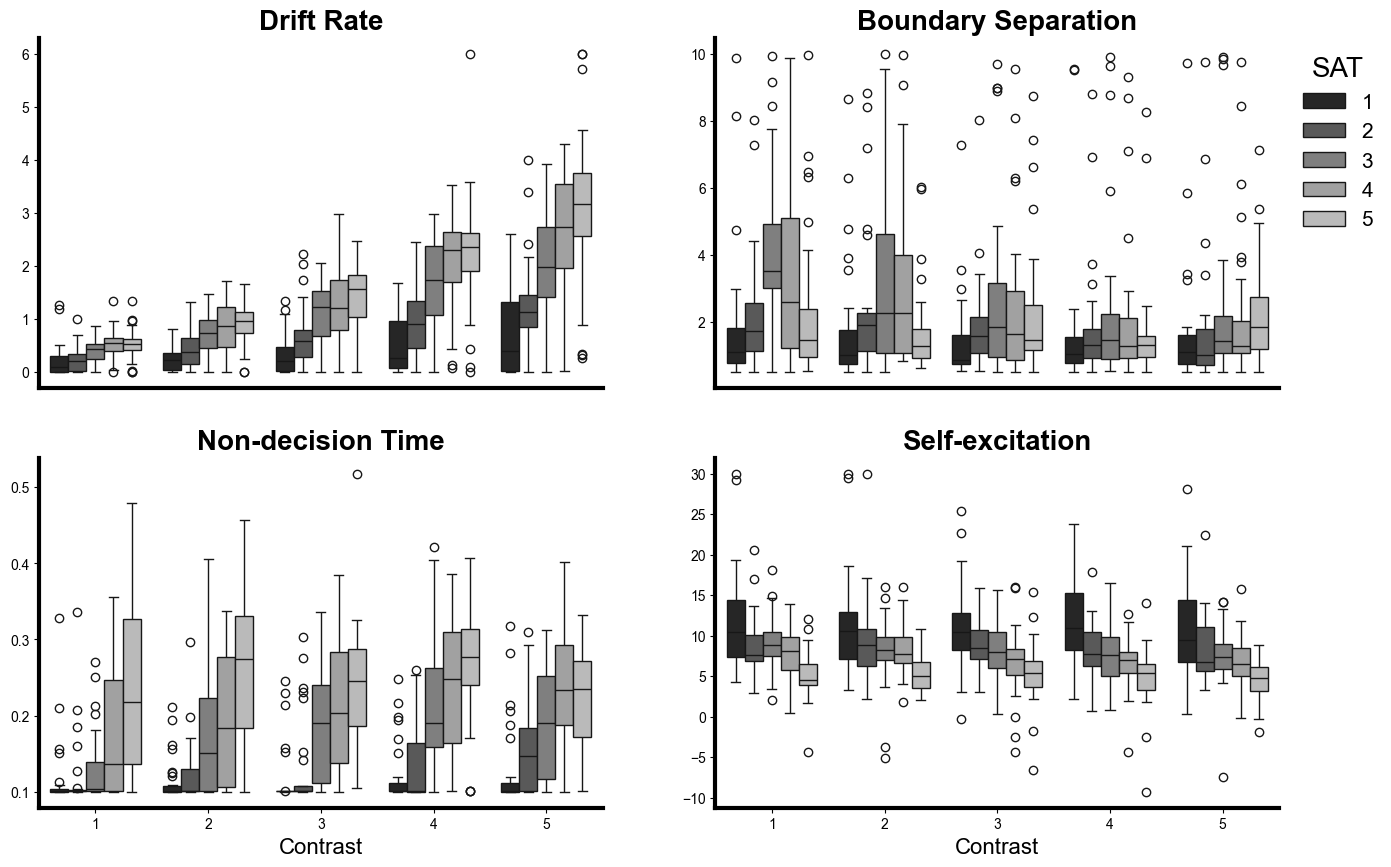

In [5]:
params = ["Drift Rate", "Boundary Separation", "Non-decision Time", "Self-excitation"]
indices = [(0,0), (0,1),(1,0),(1,1)]

#palette = ["#b5d1ae","#80ae9a","#568b87","#326b77","#122740"]
palette = ["#262626", "#595959", "#7f7f7f", "#a1a1a1", "#bababa"]
    
fig, ax = plt.subplots(2,2,figsize=(16,10))

for i in range(4):

    sns.boxplot(ax = ax[indices[i]], data=df, x="Contrast", y=params[i], hue="SAT",palette=palette)
    ax[indices[i]].spines[['right', 'top']].set_visible(False)
    ax[indices[i]].spines[['left', 'bottom']].set_linewidth(3)

    ax[indices[i]].set_ylabel("")
    ax[indices[i]].set_title(params[i], font = "Arial", size = 20, weight='bold') 
    #ax[indices[i]].get_legend().remove()
    
ax[0,0].set_xlabel("")
ax[0,1].set_xlabel("")
ax[1,0].set_xlabel("Contrast", size = 16)
ax[1,1].set_xlabel("Contrast", size = 16)

ax[indices[1]].legend(title = "SAT",loc="upper right", bbox_to_anchor=(1.2, 1), frameon=False,fontsize= 15,title_fontsize=20)

ax[indices[0]].get_legend().remove()
ax[indices[2]].get_legend().remove()
ax[indices[3]].get_legend().remove()

ax[0,0].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax[0,1].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)



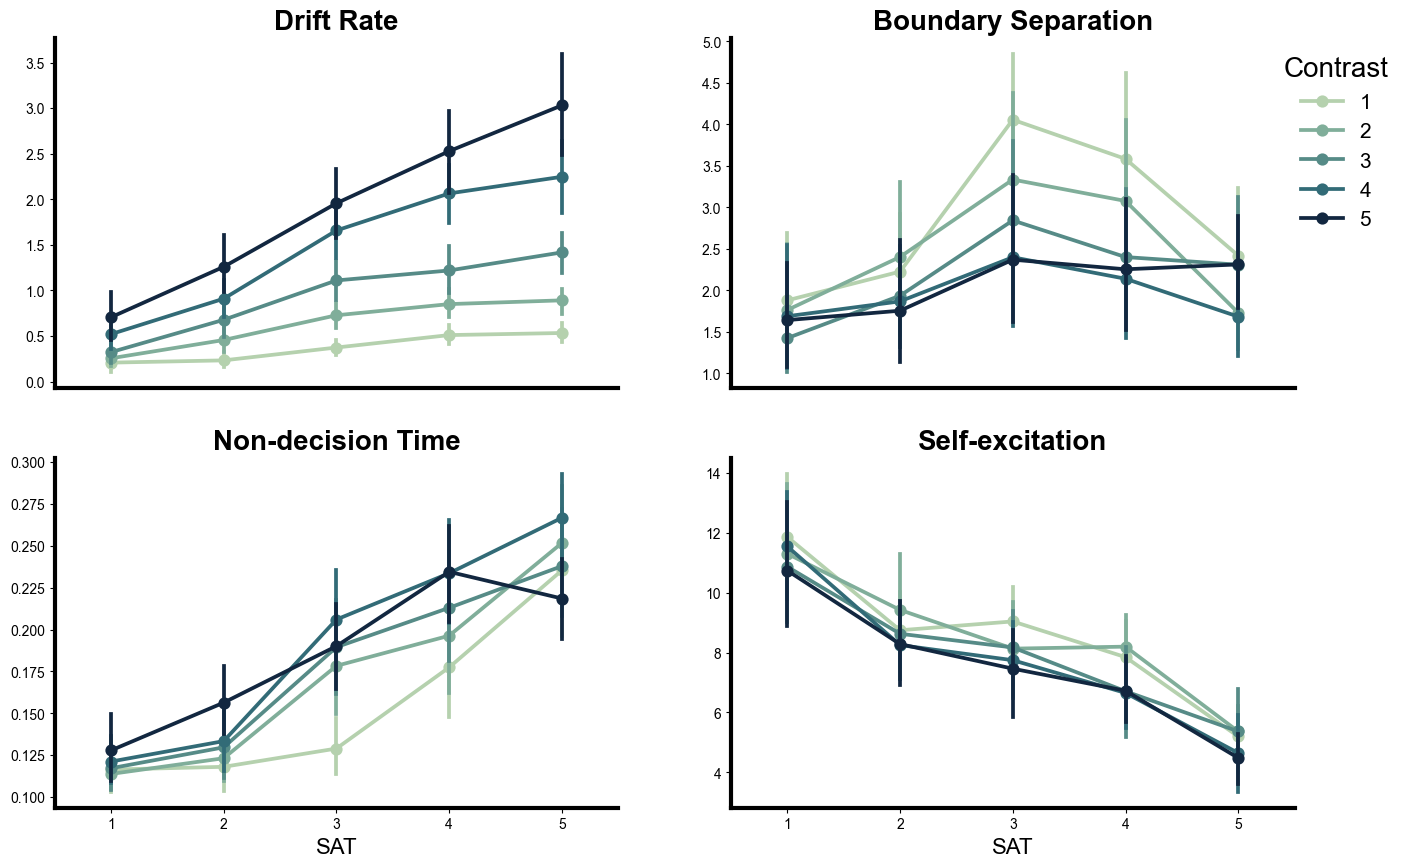

In [105]:
params = ["Drift Rate", "Boundary Separation", "Non-decision Time", "Self-excitation"]
indices = [(0,0), (0,1),(1,0),(1,1)]

palette = ["#b5d1ae","#80ae9a","#568b87","#326b77","#122740"]

fig, ax = plt.subplots(2,2,figsize=(16,10))

for i in range(4):

    sns.pointplot(ax = ax[indices[i]], data=df, x="SAT", y=params[i], hue="Contrast",palette=palette)
    ax[indices[i]].spines[['right', 'top']].set_visible(False)
    ax[indices[i]].spines[['left', 'bottom']].set_linewidth(3)

    ax[indices[i]].set_ylabel("")
    ax[indices[i]].set_title(params[i], font = "Arial", size = 20, weight='bold') 
    #ax[indices[i]].get_legend().remove()
    
ax[0,0].set_xlabel("")
ax[0,1].set_xlabel("")
ax[1,0].set_xlabel("SAT", size = 16)
ax[1,1].set_xlabel("SAT", size = 16)

ax[indices[1]].legend(title = "Contrast",loc="upper right", bbox_to_anchor=(1.2, 1), frameon=False,fontsize= 15,title_fontsize=20)

ax[indices[0]].get_legend().remove()
ax[indices[2]].get_legend().remove()
ax[indices[3]].get_legend().remove()

ax[0,0].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax[0,1].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)



In [56]:
import pingouin as pg

pg.rm_anova(data=df, dv='Drift Rate',subject='participant', within=['Contrast','SAT'])

/Users/wangjiashun/anaconda3/envs/pyddm/lib/python3.11/site-packages/pingouin/distribution.py:515: UserWarning: Epsilon values might be innaccurate in two-way repeated measures design where each  factor has more than 2 levels. Please  double-check your results.
  warnings.warn(


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,Contrast,231.163065,4,116,57.790766,111.558094,8.238545e-39,1.648244e-13,0.386550,0.306041
1,SAT,153.923223,4,116,38.480806,54.416966,9.452929e-26,5.060342e-14,0.295565,0.499532
2,Contrast * SAT,52.907529,16,464,3.306721,20.099072,1.442161e-43,2.942047e-08,0.126042,0.146343


In [57]:
import pingouin as pg

pg.rm_anova(data=df, dv='Self-excitation',subject='participant', within=['Contrast','SAT'])

/Users/wangjiashun/anaconda3/envs/pyddm/lib/python3.11/site-packages/pingouin/distribution.py:515: UserWarning: Epsilon values might be innaccurate in two-way repeated measures design where each  factor has more than 2 levels. Please  double-check your results.
  warnings.warn(


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,Contrast,116.814991,4,116,29.203748,5.331500,5.613202e-04,0.002151,0.009226,0.738698
1,SAT,3093.315214,4,116,773.328803,17.238812,4.011064e-11,0.000002,0.197810,0.493589
2,Contrast * SAT,65.492249,16,464,4.093266,0.773921,7.157495e-01,0.494261,0.005194,0.160676


In [59]:
import pingouin as pg

pg.linear_regression(y=df['Drift Rate'], X=df[['Contrast','SAT']])

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,-1.053030,0.087274,-12.065790,9.416980e-31,0.469802,0.468382,-1.224361,-0.881698
1,Contrast,0.389296,0.019515,19.948500,2.648847e-71,0.469802,0.468382,0.350985,0.427607
2,SAT,0.317060,0.019515,16.246967,4.694411e-51,0.469802,0.468382,0.278750,0.355371


In [101]:
pg.linear_regression(y=df['Self-excitation'], X=df[['Contrast','SAT']])

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,13.052947,0.477847,27.316170,1.863321e-114,0.191368,0.189203,12.114864,13.991030
1,Contrast,-0.271696,0.106850,-2.542787,1.119788e-02,0.191368,0.189203,-0.481458,-0.061935
2,SAT,-1.394450,0.106850,-13.050562,3.254331e-35,0.191368,0.189203,-1.604212,-1.184688


In [27]:
print(pingouin(data=df, depvar='Drift Rate',subject='participant', within=['SAT']).fit())

NameError: name 'AnovaRM' is not defined

In [ ]:
df = df.rename({'Stimulus Contrast': 'Contrast',
                "Effective Inhibition": 'Self-excitation'
               }, axis=1)
df.to_csv('OUMresult_Rafiei2021_old.csv')


In [69]:
mlm = df.rename(columns ={'Drift Rate': "v"})
mlm

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Contrast,SAT,participant,v,Boundary Separation,Non-decision Time,Self-excitation
0,0,0,2,1,1,1,0.000000,1.568888,0.100309,17.044047
1,1,1,3,1,2,1,0.579896,0.954466,0.185385,8.473042
2,2,2,4,1,3,1,0.288890,3.318995,0.139665,11.154863
3,3,3,5,1,4,1,0.071698,4.568654,0.103355,10.613806
4,4,4,6,1,5,1,0.510670,0.944485,0.225989,3.787335
...,...,...,...,...,...,...,...,...,...,...
745,745,245,247,5,1,30,0.000000,1.270804,0.100128,14.764992
746,746,246,248,5,2,30,2.168604,4.345238,0.176434,13.616276
747,747,247,249,5,3,30,3.925519,0.833694,0.303050,6.235077
748,748,248,250,5,4,30,3.494954,0.748982,0.306886,6.802331


In [70]:
import statsmodels.api as sm

import statsmodels.formula.api as smf

md = smf.mixedlm("v ~ SAT + Contrast", data=mlm, groups=df["participant"])

In [71]:
mdf = md.fit()

print(mdf.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: v        
No. Observations: 750     Method:             REML     
No. Groups:       30      Scale:              0.3877   
Min. group size:  25      Log-Likelihood:     -754.0375
Max. group size:  25      Converged:          Yes      
Mean group size:  25.0                                 
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept    -1.053    0.107 -9.830 0.000 -1.263 -0.843
SAT           0.317    0.016 19.723 0.000  0.286  0.349
Contrast      0.389    0.016 24.216 0.000  0.358  0.421
Group Var     0.189    0.088                           



In [6]:
results = pd.read_csv("ADDM-OUM-fixation-depend-on-first-inspection-new-plot-v_R=2.csv")

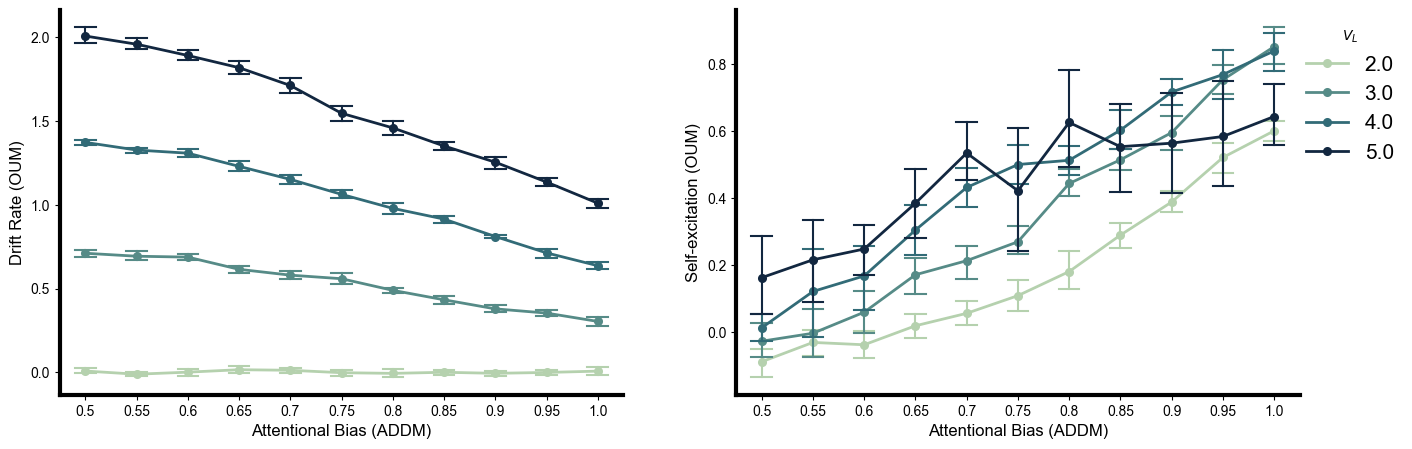

In [7]:
## add negative sign before drift_R
# v_L = 4, v_R = 2, theta = 0.5
#palette = ["#80ae9a","#568b87","#326b77","#1b485e"]
palette = ["#b5d1ae","#568b87","#326b77","#122740"]

par_fitted_list = ["v","k"]
par_fitted_labels=["Drift Rate (OUM)", "Self-excitation (OUM)"]
fig, axes = plt.subplots(1, 2, figsize=(16,5))

for i in range(2):
    sns.pointplot(ax=axes[i], data = results, x = "bias", y = par_fitted_list[i],palette=palette,
                hue = "v_L", linewidth = 2,capsize=0.4,err_kws={'linewidth': 1.5})  #s = 20, facecolors='none', edgecolors='k'
    axes[i].set_xlabel("Attentional Bias (ADDM)", fontsize=12)
    axes[i].set_ylabel(par_fitted_labels[i], fontsize=12)
    axes[i].spines[['right', 'top']].set_visible(False)
    axes[i].spines[['left', 'bottom']].set_linewidth(3)


axes[0].get_legend().remove()
axes[1].legend(title = "$V_L$", loc = "upper right",bbox_to_anchor=(1.2, 1), frameon=False,fontsize= 15)
#plt.text(x=-14.5,y=0.3, s="a", fontsize = 20, weight='bold')
#plt.text(x=-2.5,y=0.3, s="b", fontsize = 20, weight='bold')

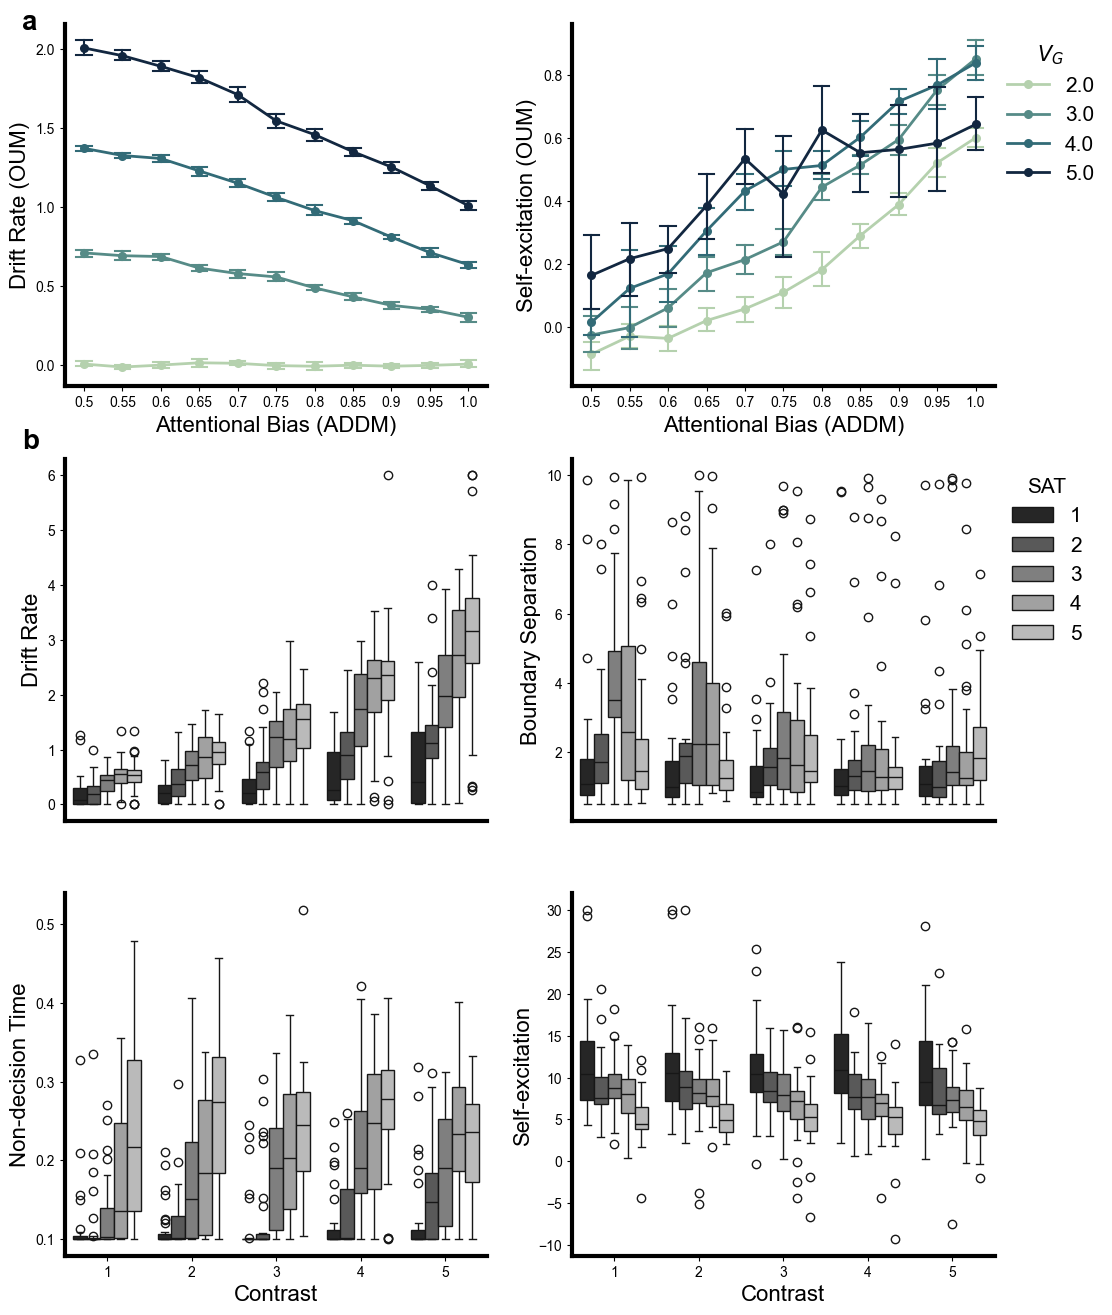

In [10]:
## add negative sign before drift_R
# v_L = 4, v_R = 2, theta = 0.5
#palette = ["#80ae9a","#568b87","#326b77","#1b485e"]
palette = ["#b5d1ae","#568b87","#326b77","#122740"]

par_fitted_list = ["v","k"]
par_fitted_labels=["Drift Rate (OUM)", "Self-excitation (OUM)"]
fig, ax = plt.subplots(3, 2, figsize=(12,16))

for i in range(2):
    sns.pointplot(ax=ax[0,i], data = results, x = "bias", y = par_fitted_list[i],palette=palette,
                hue = "v_L", linewidth = 2,capsize=0.4,err_kws={'linewidth': 1.5})  #s = 20, facecolors='none', edgecolors='k'
    ax[0,i].set_xlabel("Attentional Bias (ADDM)", fontsize=16)
    ax[0,i].set_ylabel(par_fitted_labels[i], fontsize=16)
    ax[0,i].spines[['right', 'top']].set_visible(False)
    ax[0,i].spines[['left', 'bottom']].set_linewidth(3)


ax[0,0].get_legend().remove()
ax[0,1].legend(title = "$V_G$", loc = "upper right",bbox_to_anchor=(1.28, 1), frameon=False,fontsize= 15,title_fontsize=15)


params = ["Drift Rate", "Boundary Separation", "Non-decision Time", "Self-excitation"]
indices = [(1,0), (1,1),(2,0),(2,1)]
#indices = [(0,0), (0,1),(1,0),(1,1)]

#palette = ["#b5d1ae","#80ae9a","#568b87","#326b77","#122740"]
palette = ["#262626", "#595959", "#7f7f7f", "#a1a1a1", "#bababa"]
    
#fig, ax = plt.subplots(2,2,figsize=(16,10))

for i in range(4):
    #print(i)
    sns.boxplot(ax = ax[indices[i]], data=df, x="Contrast", y=params[i], hue="SAT",palette=palette)
    ax[indices[i]].spines[['right', 'top']].set_visible(False)
    ax[indices[i]].spines[['left', 'bottom']].set_linewidth(3)

    #ax[indices[i]].set_ylabel("")
    #ax[indices[i]].set_title(params[i], font = "Arial", size = 20, weight='bold') 
    ax[indices[i]].set_ylabel(params[i],size = 16) 
    #ax[indices[i]].get_legend().remove()
    
ax[1,0].set_xlabel("")
ax[1,1].set_xlabel("")
ax[2,0].set_xlabel("Contrast", size = 16)
ax[2,1].set_xlabel("Contrast", size = 16)

ax[indices[1]].legend(title = "SAT",loc="upper right", bbox_to_anchor=(1.25, 1), frameon=False,fontsize= 15,title_fontsize=15)

ax[indices[0]].get_legend().remove()
ax[indices[2]].get_legend().remove()
ax[indices[3]].get_legend().remove()

ax[1,0].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax[1,1].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.text(x=-7,y=135, s="a", fontsize = 20, weight='bold')
plt.text(x=-7,y=85, s="b", fontsize = 20, weight='bold')


plt.rcParams['pdf.fonttype']=42
plt.rcParams['ps.fonttype']=42

plt.savefig("/Users/wangjiashun/Desktop/Research_on_SAT/Draft/Figures/fig7ab.pdf")

## 

0
1
2
3


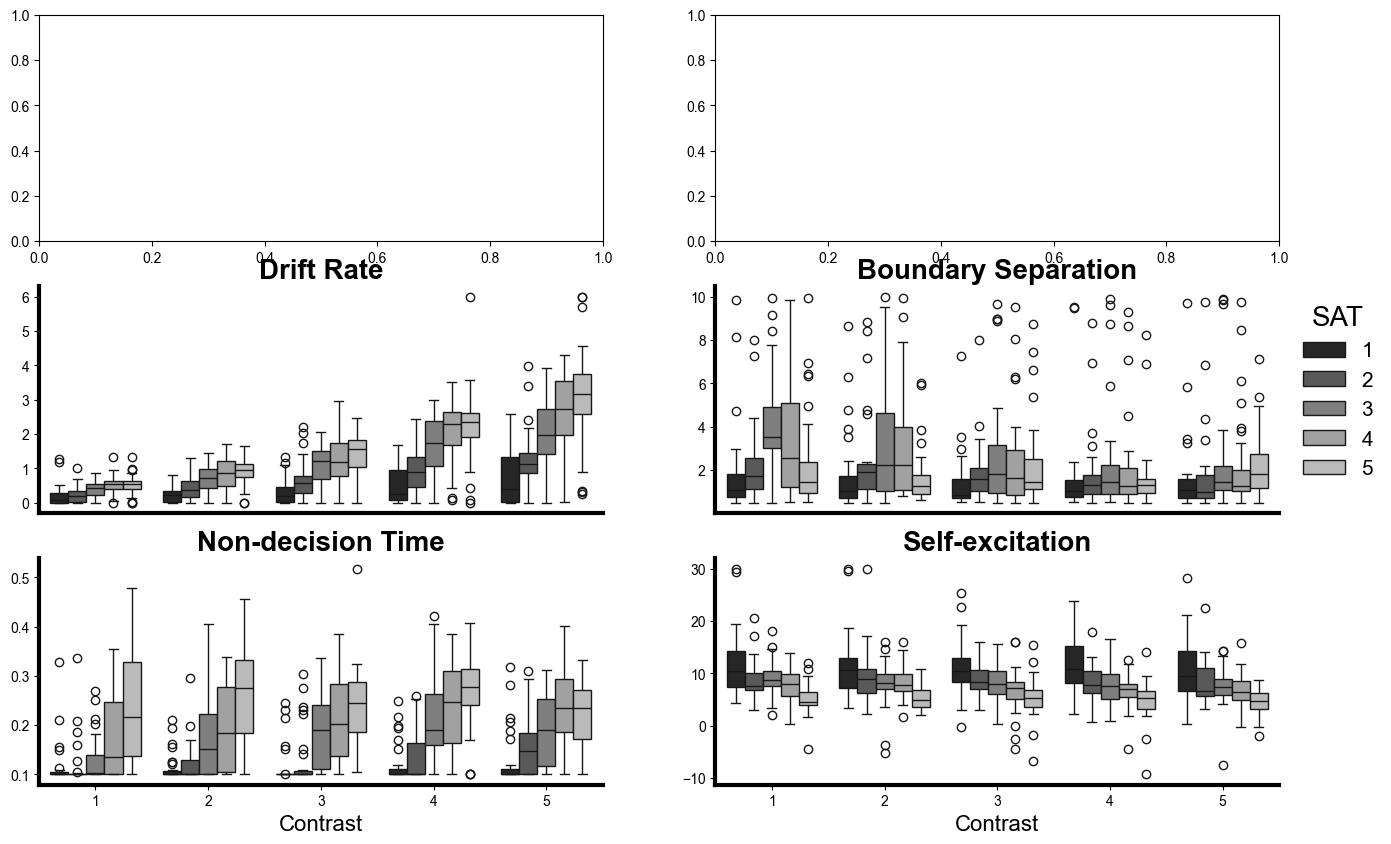

In [141]:
fig, ax = plt.subplots(3,2,figsize=(16,10))

palette = ["#b5d1ae","#568b87","#326b77","#122740"]

par_fitted_list = ["v","k"]
par_fitted_labels=["Drift Rate (OUM)", "Self-excitation (OUM)"]
#fig, axes = plt.subplots(3, 2, figsize=(16,15))

for i in range(2):
    sns.pointplot(ax=axes[0,i], data = results, x = "bias", y = par_fitted_list[i],palette=palette,
                hue = "v_L", linewidth = 2,capsize=0.4,err_kws={'linewidth': 1.5})  #s = 20, facecolors='none', edgecolors='k'
    axes[0,i].set_xlabel("Attentional Bias (ADDM)", fontsize=12)
    axes[0,i].set_ylabel(par_fitted_labels[i], fontsize=12)
    axes[0,i].spines[['right', 'top']].set_visible(False)
    axes[0,i].spines[['left', 'bottom']].set_linewidth(3)


axes[0,0].get_legend().remove()
axes[0,1].legend(title = "Left Value", loc = "upper right",bbox_to_anchor=(1.2, 1), frameon=False,fontsize= 15)




params = ["Drift Rate", "Boundary Separation", "Non-decision Time", "Self-excitation"]
indices = [(1,0), (1,1),(2,0),(2,1)]
#indices = [(0,0), (0,1),(1,0),(1,1)]

#palette = ["#b5d1ae","#80ae9a","#568b87","#326b77","#122740"]
palette = ["#262626", "#595959", "#7f7f7f", "#a1a1a1", "#bababa"]


for i in range(4):
    print(i)
    sns.boxplot(ax = ax[indices[i]], data=df, x="Contrast", y=params[i], hue="SAT",palette=palette)
    ax[indices[i]].spines[['right', 'top']].set_visible(False)
    ax[indices[i]].spines[['left', 'bottom']].set_linewidth(3)

    ax[indices[i]].set_ylabel("")
    ax[indices[i]].set_title(params[i], font = "Arial", size = 20, weight='bold') 
    #ax[indices[i]].get_legend().remove()
    
ax[1,0].set_xlabel("")
ax[1,1].set_xlabel("")
ax[2,0].set_xlabel("Contrast", size = 16)
ax[2,1].set_xlabel("Contrast", size = 16)

ax[indices[1]].legend(title = "SAT",loc="upper right", bbox_to_anchor=(1.2, 1), frameon=False,fontsize= 15,title_fontsize=20)

ax[indices[0]].get_legend().remove()
ax[indices[2]].get_legend().remove()
ax[indices[3]].get_legend().remove()

ax[1,0].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax[1,1].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

